# School Matcher Graph Demo

This notebook demonstrates using the SchoolMatch AI project with LangGraph.

## 1. Setup and Imports

In [1]:
# Import necessary libraries
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate 
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph, START, END, Graph
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict

from langchain_app.school_matcher_graph import create_school_matcher_graph, run_school_matcher
from db.college_vector_store import CollegeVectorStore

## 2. Initialize Components

In [2]:
# Enable LangSmith tracing (optional)
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch-ai"

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

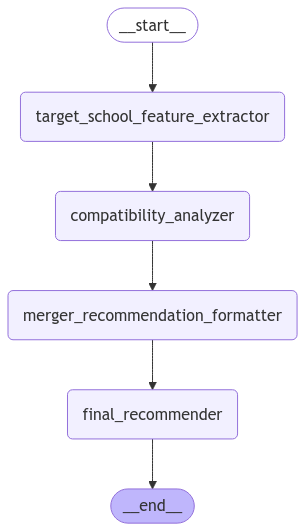

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## 3. Run School Matcher

In [5]:
# Run the graph with a sample university
school_name = "Montana State University"
result = run_school_matcher(graph, school_name)

# Display the result
print("\nFeatures Extracted:")
print(result["features"])

for analysis in result["compatibility_analyses"]:
    print(f"\nSchool: {analysis.school}")
    print(f"Location: {analysis.location}")
    print(f"Analysis: {analysis.analysis}")
    print(f"Similarity Score: {analysis.similarity_score}")

print("\nFinal Recommendation:")
print(result["final_recommendation"])

Error in recommendation formatter: "Input to ChatPromptTemplate is missing variables {'school'}.  Expected: ['school'] Received: ['compatibility_analyses', 'run_name']\nNote: if you intended {school} to be part of the string and not a variable, please escape it with double curly braces like: '{{school}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "

Features Extracted:
1. Financial:
   - Type: Public university
   - Size/scope: Montana State University (MSU) is a comprehensive research university offering undergraduate and graduate programs across a wide range of disciplines.
   - Key revenue programs: MSU generates revenue through tuition fees, state funding, research grants, and donations.

2. Academic:
   - Programs: MSU offers a diverse range of academic programs including agriculture, engineering, business, education, nursing, and the sciences.
   - Degrees: MSU offers undergraduate, graduate, and doctoral degrees in